# <html>
<div  style="background-color:w; color:#636363;border:#63b365; border-width:5px;border-radius:10px 10px; border-style:solid;">

    
<p><center><img src="https://drive.google.com/thumbnail?id=1yPGYO8HkTanlqsIXozDIUvUVuvawAdG_" width ="6%"  /><font size=8> <b>Lung Cancer Prediction</b></font> </p>


</div>

# <span style="color:#32936f;"> <center>Libraries </span>

In [1]:
# Data Manipulation:
import pandas as pd
import matplotlib as mpl
import seaborn as sns 



# Visualization:
import matplotlib.pyplot as plt
import plotly.express as px

# Data tratament :
from sklearn.preprocessing import StandardScaler 
from collections import Counter
from sklearn.model_selection import train_test_split

# Models:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evolution:
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# <span style="color:#32936f;"> <center>Importing Dataset </span>

In [2]:
data = pd.read_csv("../input/lung-cancer/survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<div  style="background-color:w; color:#636363;border:indianred; border-width:2px; border-style:solid;">

   
<p ><font size=4><b>Note:</font> </p>
<p><font size = 4>
There isn't null values in dataset
    The data "GENDER" and "LUNG_CANCER" are objects : transform to numerc values 
</p>
</div>

# <span style="color:#32936f;"> <center>Data Visualization </span>

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SMOKING'}>,
        <AxesSubplot:title={'center':'YELLOW_FINGERS'}>,
        <AxesSubplot:title={'center':'ANXIETY'}>],
       [<AxesSubplot:title={'center':'PEER_PRESSURE'}>,
        <AxesSubplot:title={'center':'CHRONIC DISEASE'}>,
        <AxesSubplot:title={'center':'FATIGUE '}>,
        <AxesSubplot:title={'center':'ALLERGY '}>],
       [<AxesSubplot:title={'center':'WHEEZING'}>,
        <AxesSubplot:title={'center':'ALCOHOL CONSUMING'}>,
        <AxesSubplot:title={'center':'COUGHING'}>,
        <AxesSubplot:title={'center':'SHORTNESS OF BREATH'}>],
       [<AxesSubplot:title={'center':'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot:title={'center':'CHEST PAIN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

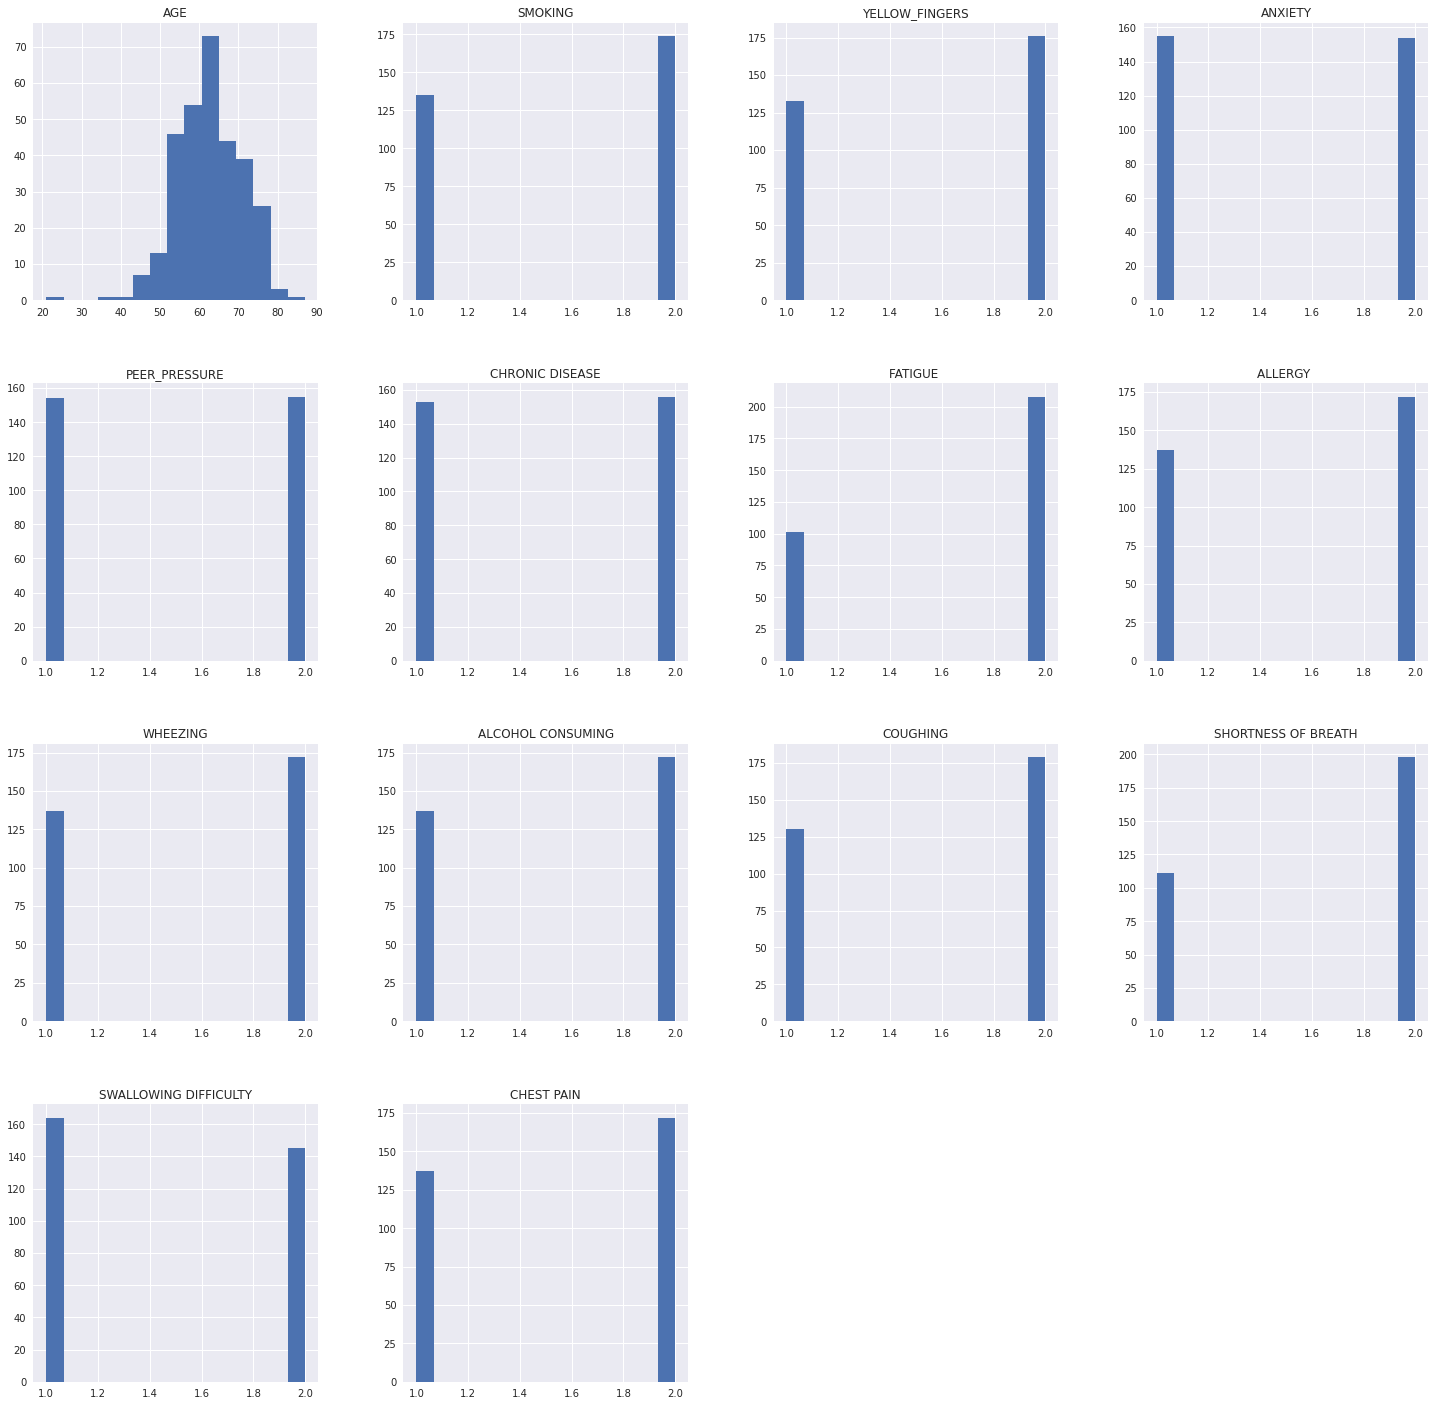

In [5]:
plt.style.use("seaborn")
data.hist(figsize=(25,25), bins=15)

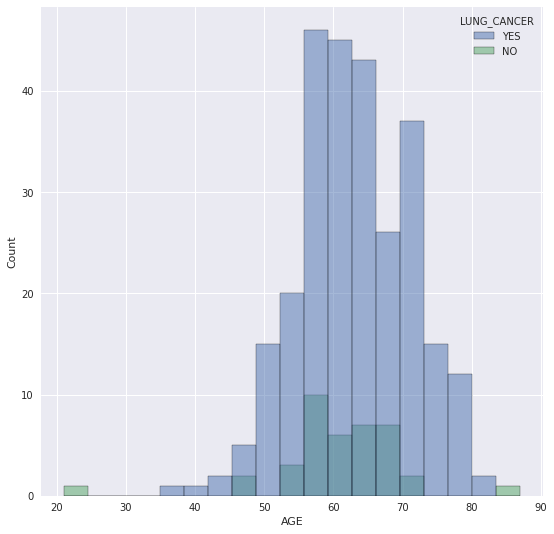

In [6]:
plt.figure(figsize=(9,9))
sns.histplot(data[['AGE', 'LUNG_CANCER']], x = "AGE", hue="LUNG_CANCER")
plt.title("")
plt.show()

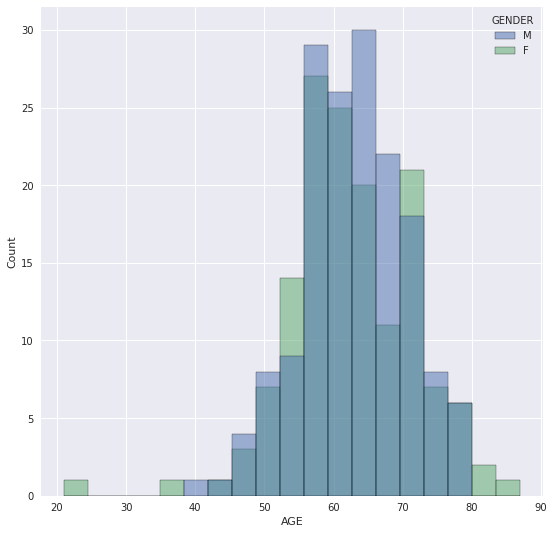

In [7]:
plt.figure(figsize=(9,9))
sns.histplot(data[['AGE', 'GENDER']], x = "AGE", hue="GENDER")
plt.title("")
plt.show()

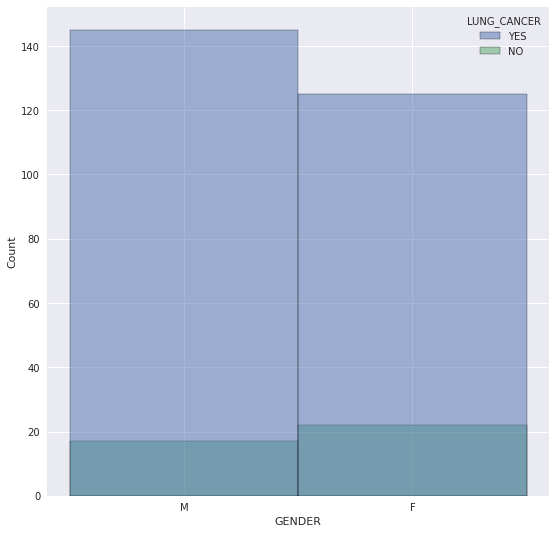

In [8]:
plt.style.use("seaborn")
plt.figure(figsize=(9,9))
sns.histplot(data[['GENDER', 'LUNG_CANCER']], x = "GENDER", hue="LUNG_CANCER")
plt.title("")
plt.show()

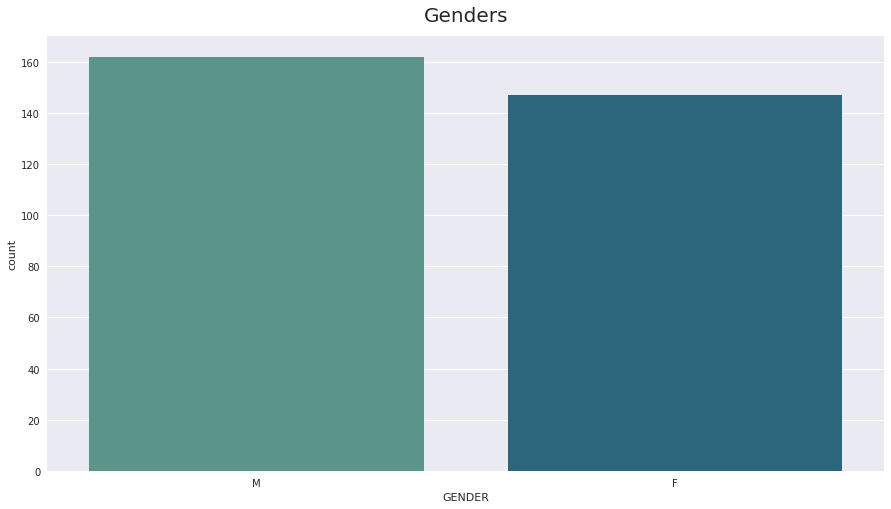

In [9]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
plt.title("Genders", fontsize=20, y=1.02)
sns.countplot(x = data.GENDER ,palette="crest")
plt.show()

# <span style="color:#32936f;"> <center>Data Tratament </span>

<div  style="background-color:w; color:#636363;border:indianred; border-width:2px; border-style:solid;">

   
<p ><font size=4><b>Note:</font> </p>
<p><font size = 4>
There are some columns where the values are object, we need transform this values in numerical 
</p>
</div>

In [10]:
data["GENDER"] = data["GENDER"].map({"F": 0, "M": 1})
data['LUNG_CANCER']= data['LUNG_CANCER'].map({'NO':0, "YES":1})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

# <span style="color:#32936f;"> Splitting the data </span>

In [12]:
# X data 
X = data.drop("LUNG_CANCER", axis = 1)

In [13]:
# y data 
y = data["LUNG_CANCER"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split (X, y , test_size = 0.2, random_state = 35)

In [15]:
len(x_test), len(x_train)

(62, 247)

# <span style="color:#32936f;"> Scaling the data </span>

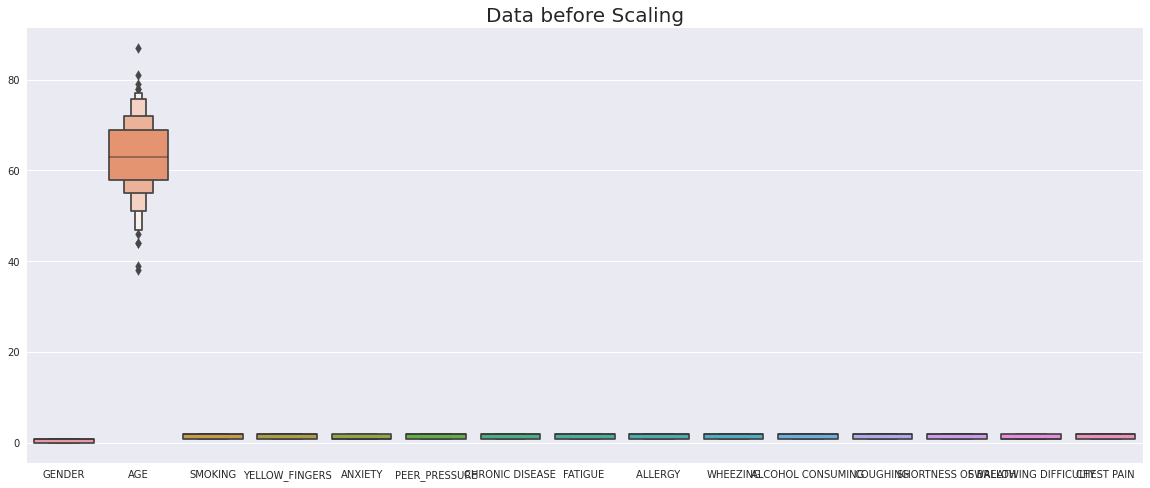

In [16]:
plt.figure(figsize=(20,8))
plt.title("Data before Scaling", fontsize = 20, y=1.0)
sns.boxenplot(data=x_train)
plt.show()

In [17]:
# Scaling data:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

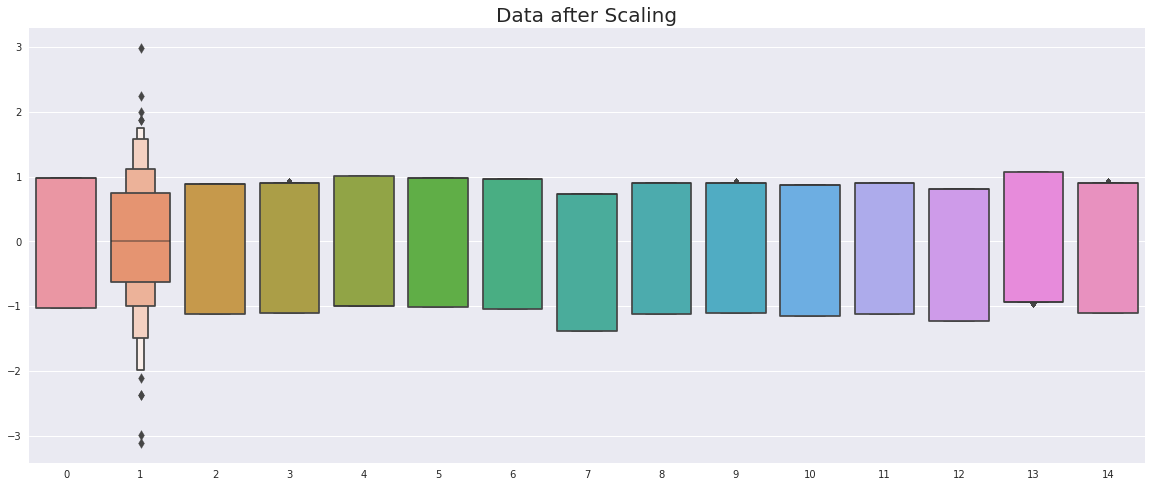

In [18]:
plt.figure(figsize=(20,8))
plt.title("Data after Scaling", fontsize = 20, y=1.0)
sns.boxenplot(data=x_train)
plt.show()

# <span style="color:#32936f;"> Spot Checking </span>

In [19]:
from warnings import filterwarnings


In [20]:
filterwarnings('ignore')

In [21]:
models = [("LR", LogisticRegression(max_iter=1000)),
          ("SVC", SVC()),
          ("KNC", KNeighborsClassifier(n_neighbors=10)),
          ("DTC", DecisionTreeClassifier()),
          ("GNB", GaussianNB()),
         ("SGDC", SGDClassifier()),
         ("Perc", Perceptron()),
          ("NC", NearestCentroid()),
          ("Ridge", RidgeClassifier()),
          ("BNB", BernoulliNB()),
          ("RF", RandomForestClassifier()),
          ("ADA", AdaBoostClassifier()),
          ("XGB", GradientBoostingClassifier()),
          ("PAC", PassiveAggressiveClassifier()) 
    
]

results = []
names=[]
finalresults=[]

for name, model in models:
    model.fit(x_train, y_train)
    model_results = model.predict(x_test)
    score= precision_score(y_test, model_results, average='macro')
    results.append(score)
    names.append(name)
    finalresults.append((name,score))

In [22]:
finalresults.sort(key=lambda k:k[1], reverse=True)
finalresults

[('RF', 0.9583333333333333),
 ('LR', 0.8405172413793103),
 ('SVC', 0.8405172413793103),
 ('GNB', 0.8405172413793103),
 ('Ridge', 0.8405172413793103),
 ('XGB', 0.8405172413793103),
 ('BNB', 0.8065476190476191),
 ('KNC', 0.7649122807017543),
 ('SGDC', 0.7649122807017543),
 ('ADA', 0.7649122807017543),
 ('DTC', 0.7584415584415585),
 ('Perc', 0.7584415584415585),
 ('NC', 0.6939203354297694),
 ('PAC', 0.650462962962963)]

# <span style="color:#32936f;"> Hiperparameter Tuning </span>

In [23]:
# Grid search and space:
models_params= {
    "RF":{'model':RandomForestClassifier(),
         'params':{
             'max_features': list(range(1,10)),
             'n_estimators':[10,100,1000]
         }}}

# Evaluation:

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=20)

# Search:
scores=[]

for model_name, params in models_params.items(): 
    rs = RandomizedSearchCV(params['model'], params['params'], cv=cv , n_iter=10)
    rs.fit(x_train,y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

,Model,Parameters,Score
0,RF,"{'n_estimators': 1000, 'max_features': 3}",0.918457
